<center><b><span style=font-size:30px><font color='MediumBlue'><u>Project</u></font></span></b></center><br>
<center><b><span style=font-size:30px><font color='MediumBlue'><u> Credit Card Fraud Dataset</u></font></span></b></center><br>

In [1]:
# Importing Required Library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset 'Credit Card Fraud'

df = pd.read_csv('creditcard.csv')

In [3]:
# Displaying the first 5 values

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking size of creditcard Dataset
 
df.shape

(284807, 31)

In [5]:
# Checking if any null value present or not

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [46]:
# Checking columns data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<b><span style=font-size:20px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- As there are no Null Values and all the Column Data Types are Numeric now we will perform different Machine Learning Techniques.

<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>- <font color='MediumBlue'>Importing Libraries</font></span></b>

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
# To check the columns 

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# Separating Independent and Dependent variable to Train and Test the Dataset

X = df.drop('Class',axis=1)
Y = df['Class']

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=1)

<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>- <font color='MediumBlue'>Appling StandardScaler</font></span></b>

In [10]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [11]:
# User Define function:

def create_model(model):
    model.fit(X_train,Y_train) # We Train the model
    Y_pred = model.predict(X_test) # Testing model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))

<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>- <font color='MediumBlue'>Using LogisticRegression</font></span></b>

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)
lr = create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443

[[85293    15]
 [   57    78]]


<b><span style=font-size:20px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- From the above Logistic Regression we got .58 Prediction i.e. 58% which is too Low

<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>- <font color='OrangeRed'>Here as we can see the data is not equaly distributed.</font></span></b>

In [13]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

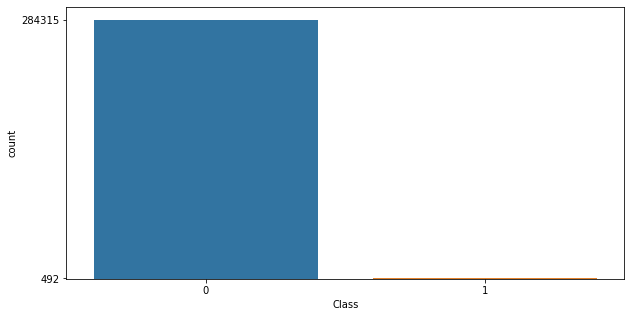

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Class')
f = df['Class'].value_counts()
plt.yticks(f)
plt.show()

<b><span style=font-size:20px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- From the above value_counts of 'Class' Column and from the Graph


- There are about: <b>'284315' Transactions out of which '492' were Fraud</b>


- Which means the Data is not properly distributed 

<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>- <font color='OrangeRed'>Appling ' RandomOverSampler ' to make data equal.</font></span></b>

In [15]:
# Apply random over sampling : inbuild class
from imblearn.over_sampling import RandomOverSampler

In [16]:
ros = RandomOverSampler(random_state=1)

In [17]:
# Before apply RandomOverSampler on training data
Y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [18]:
# Applied OverSampler on Training data (70%)
X_train_ros,Y_train_ros = ros.fit_resample(X_train,Y_train)

In [19]:
# Check after apply RandomOverSampler
Y_train_ros.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [20]:
# Before apply RandomOverSampler on testing data
Y_test.value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [21]:
# Also apply RandomOverSampler on tesing data (30%)
X_test_ros,Y_test_ros = ros.fit_resample(X_test,Y_test)

In [22]:
Y_test_ros.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

In [23]:
# User Define function After Equalizing Dataset:

def create_modele(model):
    model.fit(X_train_ros,Y_train_ros) # We Train the model
    Y_pred = model.predict(X_test_ros) # Testing Model
    print(classification_report(Y_test_ros,Y_pred))
    print(confusion_matrix(Y_test_ros,Y_pred))

<b><span style=font-size:20px>1. <font color='MediumBlue'>Using LogisticRegression after Equalizing Data</font></span></b>

In [24]:
lr1 = LogisticRegression(random_state=1)

lr1 = create_modele(lr1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[83724  1584]
 [ 8874 76434]]


<b><span style=font-size:20px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- <b>Before equalizing</b> the data <b>Logistic Regression score was 58%</b> which was too Low.


- <b>After equalizing</b> the data <b>Logistic Regression score got to 90%</b> which is great.


- Still we will apply to all the methods to see if we get more accurate results.

<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>- <font color='MediumBlue'>Using DecisionTree</font></span></b>

<b><span style=font-size:20px>2. <font color='OrangeRed'>Decision Tree Using Gini Index</font></span></b>

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)
dt = create_modele(dt)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     85308
           1       1.00      0.65      0.79     85308

    accuracy                           0.83    170616
   macro avg       0.87      0.83      0.82    170616
weighted avg       0.87      0.83      0.82    170616

[[85275    33]
 [29819 55489]]


<b><span style=font-size:20px>2a. <font color='OrangeRed'>Decision Tree max_depth</font></span></b>

In [26]:
dt1 = DecisionTreeClassifier(random_state=1,max_depth=3)

dt1 = create_modele(dt1)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     85308
           1       0.98      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.92      0.92      0.92    170616
weighted avg       0.92      0.92      0.92    170616

[[83524  1784]
 [12622 72686]]


<b><span style=font-size:20px>2b. <font color='OrangeRed'>Decision Tree min_samples_leaf</font></span></b>

In [27]:
dt2 = DecisionTreeClassifier(random_state=1,min_samples_leaf=100)

dt2 = create_modele(dt2)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     85308
           1       0.99      0.83      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

[[84918   390]
 [14597 70711]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>3. <font color='OrangeRed'>Decision Tree Using Entropy</font></span></b>

In [28]:
dte = DecisionTreeClassifier(random_state=1,criterion = 'entropy')

dte = create_modele(dte)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     85308
           1       1.00      0.70      0.82     85308

    accuracy                           0.85    170616
   macro avg       0.88      0.85      0.85    170616
weighted avg       0.88      0.85      0.85    170616

[[85272    36]
 [25398 59910]]


<b><span style=font-size:20px>3a. <font color='OrangeRed'>Decision Tree max_depth</font></span></b>

In [29]:
dte1 = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=3)

dte1 = create_modele(dte1)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     85308
           1       0.97      0.85      0.91     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

[[82844  2464]
 [12542 72766]]


<b><span style=font-size:20px>3b. <font color='OrangeRed'>Decision Tree min_samples_leaf</font></span></b>

In [30]:
dte2 = DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=50)

dte2 = create_modele(dte2)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

[[85110   198]
 [17001 68307]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>- <font color='MediumBlue'>Using RandomForestClassifier</font></span></b>

In [31]:
from sklearn.ensemble import RandomForestClassifier

<b><span style=font-size:20px>4. <font color='OrangeRed'>RandomForestClassifier using Gini Index</font></span></b>

In [32]:
rfc = RandomForestClassifier(random_state=1,n_estimators=100,max_features=7)

rfc = create_modele(rfc)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

[[85300     8]
 [19055 66253]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>5. <font color='OrangeRed'>RandomForestClassifier using Entropy</font></span></b>

In [33]:
rfc2 = RandomForestClassifier(criterion='entropy',random_state=1,n_estimators=100,max_features=7)

rfc2 = create_modele(rfc2)

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     85308
           1       1.00      0.77      0.87     85308

    accuracy                           0.88    170616
   macro avg       0.91      0.88      0.88    170616
weighted avg       0.91      0.88      0.88    170616

[[85299     9]
 [19691 65617]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>- <font color='MediumBlue'>Using BoostingTechnics</font></span></b>

<b><span style=font-size:20px>6. <font color='OrangeRed'>ADA Boosting ( Adaptor Boosting )</font></span></b>

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
ada = AdaBoostClassifier(n_estimators=50,random_state=1)

ada = create_modele(ada)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     85308
           1       0.98      0.85      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

[[84102  1206]
 [12637 72671]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>7. <font color='OrangeRed'>Gradient Boosting</font></span></b>

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gbc = GradientBoostingClassifier(n_estimators=50,random_state=1)

gbc = create_modele(gbc)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     85308
           1       0.99      0.87      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[84581   727]
 [10700 74608]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>8. <font color='OrangeRed'>Xetreme Gradient Boost</font></span></b>

In [38]:
from xgboost import XGBClassifier

In [39]:
xgc = XGBClassifier(n_estimators=50,reg_alpha=1,random_state=1)

xgc = create_modele(xgc)

[10:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

[[85290    18]
 [17134 68174]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>- <font color='MediumBlue'>Using Support Vector Machine ( SVM )</font></span></b>

<b><span style=font-size:20px>9. <font color='OrangeRed'>Linear SVC</font></span></b>

In [40]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state=1)
svc = create_modele(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[83865  1443]
 [10100 75208]]


In [41]:
svc1 = LinearSVC(random_state=1,C=0.99)

svc1 = create_modele(svc1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[83834  1474]
 [ 8874 76434]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>10. <font color='OrangeRed'>SVC Polynomial Kernel Function</font></span></b>

In [42]:
from sklearn.svm import SVC

svc1 = SVC(random_state=1,kernel='poly')
svc1 = create_modele(svc1)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     85308
           1       1.00      0.84      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

[[85082   226]
 [13871 71437]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>11. <font color='OrangeRed'>SVC Radial Basis Kernel Function</font></span></b>

In [43]:
svc2 = SVC(random_state=1,kernel='rbf')

svc2 = create_modele(svc2)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     85308
           1       0.99      0.81      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

[[84567   741]
 [15791 69517]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:20px>12. <font color='OrangeRed'>KNeighborsClassifier</font></span></b>

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knc = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

knc = create_modele(knc)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

[[85247    61]
 [19106 66202]]


<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>

<b><span style=font-size:30px>- <font color='LimeGreen'>Conclusion.</font></span></b>
- We have used 17 different methods mentiond from above table with different methods with their percentage.


- The <b>Best result</b> we got is in <b>Linear Support Vector Machine i.e. 89%.</b> But we can try to get higher percentage.


- So we will <b>add errors at Training time</b> to check if we get <b>more results.<b>

    
- <b>After adding errors at Training time we got 90% on Linear Support Vector Machine.</b>

|<span style=font-size:20px>Machine Learning Methods</span>|<span style=font-size:20px>Results</span>|
|:-|:-|
|<span style=font-size:15px>1. Logistic Regression</span>|<span style=font-size:15px>0-98%<br>1-90%</span>|
|<span style=font-size:15px>2. Decision Tree Classifier (Gini Index)</span>|<span style=font-size:15px>0-100%<br>1-65%</span>|
|<span style=font-size:15px>2a. DTC (Gini Index) max_depth</span>|<span style=font-size:15px>0-98%<br>1-85%</span>|
|<span style=font-size:15px>2b. DTC (Gini Index) max_sample_leaf</span>|<span style=font-size:15px>0-100%<br>1-83%</span>|
|<span style=font-size:15px>3. Decision Tree Classifier (Entropy)</span>|<span style=font-size:15px>0-100%<br>1-70%</span>|
|<span style=font-size:15px>3a. DTC (Entropy) max_depth</span>|<span style=font-size:15px>0-97%<br>1-85%</span>|
|<span style=font-size:15px>3b. DTC (Entropy) min_sample_leaf</span>|<span style=font-size:15px>0-100%<br>1-80%</span>|
|<span style=font-size:15px>4. Random Forest Classifier (Gini Index)</span>|<span style=font-size:15px>0-100%<br>1-78%</span>|
|<span style=font-size:15px>5. Random Forest Classifier (Entropy)</span>|<span style=font-size:15px>0-100%<br>1-77%</span>|
|<span style=font-size:15px>6. ADA Boosting (Adaptor Boosting)</span>|<span style=font-size:15px>0-99%<br>1-85%</span>|
|<span style=font-size:15px>7. Gradient Boosting</span>|<span style=font-size:15px>0-99%<br>1-87%</span>|
|<span style=font-size:15px>8. Xetreme Gradient Boost</span>|<span style=font-size:15px>0-100%<br>1-80%</span>|
|<span style=font-size:15px>9. Linear SVC</span>|<span style=font-size:15px>0-98%<br>1-88%</span>|
|<span style=font-size:15px><code style="background:yellow;color:black"><b>9a. Linear SVC (Adding Errors)</b></code></span>|<span style=font-size:15px><code style="background:yellow;color:black"><b>0-98%</b></code><br><code style="background:yellow;color:black"><b>1-90%</b></code></span>|
|<span style=font-size:15px>10. SVC Polynomial Kernel Function</span>|<span style=font-size:15px>0-100%<br>1-84%</span>|
|<span style=font-size:15px>11. SVC Radial Basis Kernel Function</span>|<span style=font-size:15px>0-99%<br>1-81%</span>|
|<span style=font-size:15px>12. KNeighborsClassifier</span>|<span style=font-size:15px>0-100%<br>1-78%</span>|

<b><span style=font-size:25px><font color='Red'>------------------------------------------------------------------------------------</font></span></b>